In [69]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(df)

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (4).csv
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0 

In [70]:
df = df.drop(["Daily Steps", "Person ID", "Occupation", "Heart Rate"], axis = 1)

In [71]:
df = df.replace("Normal Weight", "Normal")

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [73]:
df["BMI Category"] = le.fit_transform(df["BMI Category"])
#Normal = 0, Obese = 1, Overweight = 2

In [74]:
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

In [75]:
new = df['Blood Pressure'].str.split("/", n =1, expand = True)

media = []
for i in range(0, 374):
  media.append((int(new[0][i]) + int(new[1][i]))/2)

In [76]:
df["BloodPressure"] = media

In [77]:
df.drop(["Blood Pressure"], axis = 1, inplace= True)

In [78]:
df.drop("Gender", axis = 1, inplace = True)

In [79]:
x = df[["Sleep Duration", "Physical Activity Level", "Stress Level", "BMI Category", 'Sleep Disorder', 'BloodPressure']]
y = df["Quality of Sleep"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [80]:
from sklearn import tree
clf = tree.DecisionTreeClassifier (criterion='entropy', max_depth=4)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [81]:
print("\nMatriz de confusão:\n",
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))


Matriz de confusão:
 Predito  4  5   6   7   8   9  Todos
Real                                
4        3  0   0   0   0   0      3
5        0  1   0   0   0   0      1
6        0  0  30   0   0   0     30
7        0  1   4  20   2   0     27
8        0  0   0   0  32   0     32
9        0  0   0   0   0  20     20
Todos    3  2  34  20  34  20    113


In [82]:
import sklearn.metrics as metrics
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions ))

Relatório sobre a qualidade:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       0.88      1.00      0.94        30
           7       1.00      0.74      0.85        27
           8       0.94      1.00      0.97        32
           9       1.00      1.00      1.00        20

    accuracy                           0.94       113
   macro avg       0.89      0.96      0.90       113
weighted avg       0.95      0.94      0.94       113



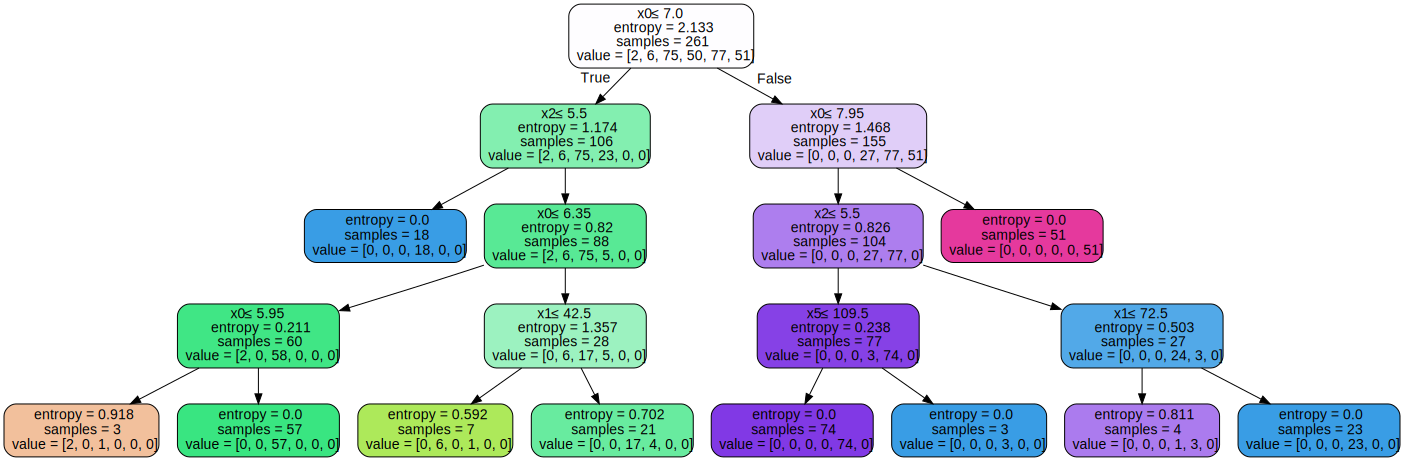

In [83]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(clf, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph